In [32]:
import json
import os

# SEZIONE DATASET DI PARTENZA

In [33]:
# Must have both the original Coco Dataset that the reduced one in order to calculate statistics

# CODE FOR ORIGINAL COCO DATASET 

original_path_val = '/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_val2017.json'
original_path_train = '/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_train2017.json'

file_path_val = original_path_val
file_path_train = original_path_train

f_val=open(file_path_val, 'r')
f_train=open(file_path_train,'r')

coco_val = json.load(f_val)
coco_train = json.load(f_train)

matches_val=[]
for anns in coco_val['annotations']:
    #if anns['image_id']==558840:
     matches_val.append(anns)

matches_train=[]
for anns in coco_train['annotations']:
    #if anns['image_id']==558840:
     matches_train.append(anns)
    
print(len(matches_val)) #This value shows the total number of instances across the entire Original Validation Dataset
print(len(matches_train)) #This value shows the total number of instances across the entire Original Train Dataset

36781
860001


In [34]:
#Capire quante imm ho per ogni cat nell Original Validation Dataset
catIds=[]
cat_counts={}
img_count=0
for cat in coco_val['categories']:
    if cat['id'] not in catIds:
        catIds.append(cat['id'])  #funziona

for img in coco_val['annotations']:
    img_count+=1
    if img['category_id'] in cat_counts:
        cat_counts[img['category_id']] = cat_counts[img['category_id']] +1
    else:
        cat_counts[img['category_id']] = 1
        
print(img_count)
cat_counts

36781


{18: 218,
 64: 343,
 72: 288,
 16: 440,
 17: 202,
 19: 273,
 20: 361,
 21: 380,
 44: 1025,
 63: 261,
 62: 1791,
 67: 697,
 2: 316,
 3: 1932,
 4: 371,
 5: 143,
 6: 285,
 7: 190,
 9: 430,
 1: 11004,
 13: 75,
 28: 413,
 32: 254,
 54: 177,
 65: 163,
 77: 262,
 82: 126,
 85: 267,
 90: 57,
 8: 415,
 10: 637,
 11: 101,
 14: 60,
 15: 413,
 34: 115,
 35: 241,
 36: 69,
 41: 179,
 42: 269,
 46: 343,
 47: 899,
 48: 215,
 49: 326,
 50: 253,
 51: 626,
 52: 379,
 53: 239,
 55: 287,
 56: 316,
 57: 371,
 59: 285,
 61: 316,
 70: 179,
 73: 231,
 74: 106,
 75: 283,
 76: 153,
 78: 55,
 79: 143,
 80: 9,
 81: 225,
 84: 1161,
 86: 277,
 87: 36,
 88: 191,
 89: 11,
 27: 371,
 31: 540,
 33: 303,
 22: 255,
 24: 268,
 38: 336,
 58: 127,
 60: 338,
 25: 232,
 39: 146,
 40: 148,
 37: 263,
 23: 71,
 43: 225}

I dati sono stati salvati in 'Numero_istanze_ORIGINAL_VAL.xlsx'


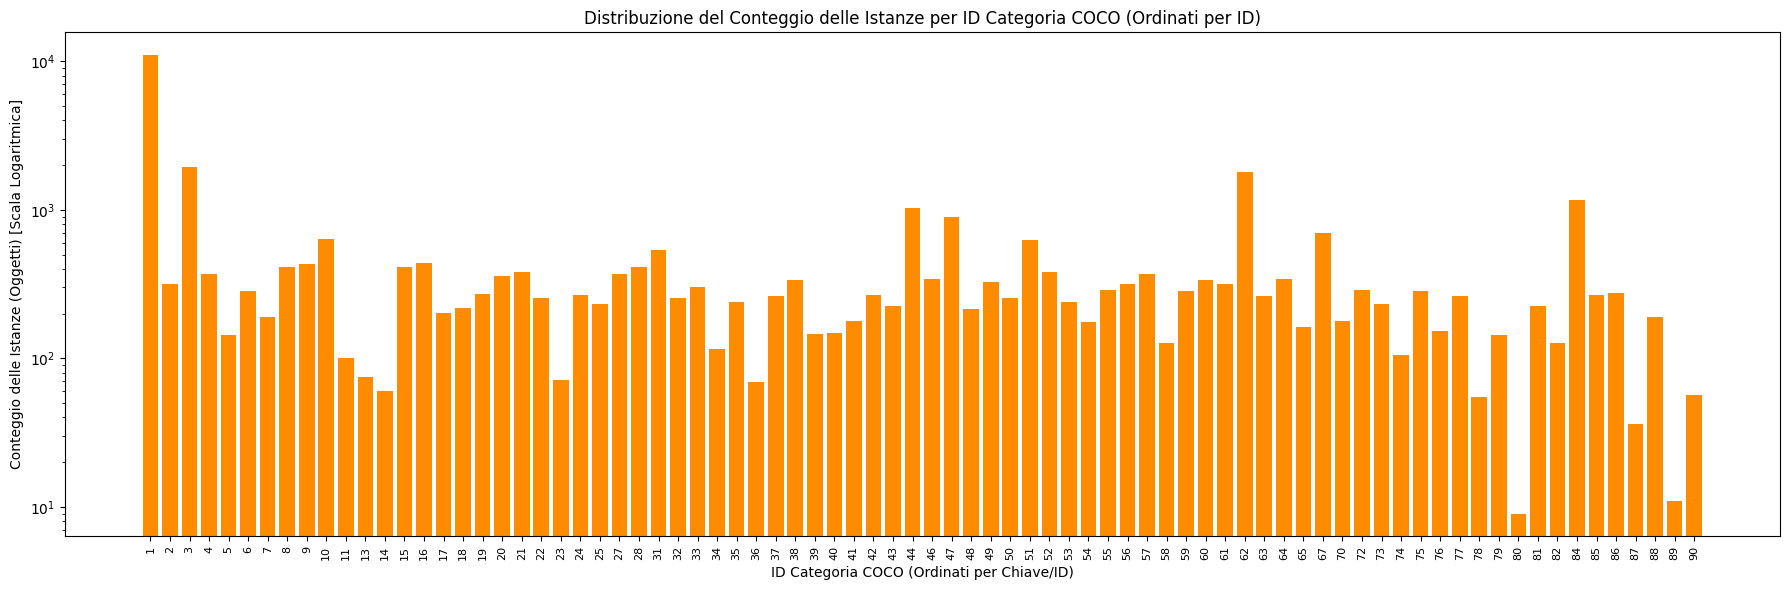

In [35]:
""" PLOTTING DISTRIBUZIONE ISTANZE E SALVATAGGIO EXCEL"""
import matplotlib.pyplot as plt
import operator

# Dati forniti (ID Categoria: Conteggio Istanze)
data_dict = cat_counts

# 1. Ordina i dati per ID Categoria (chiave) in ordine crescente
#    Usiamo itemgetter(0) per ordinare in base alla CHIAVE (l'ID della categoria).
sorted_data = sorted(data_dict.items(), key=operator.itemgetter(0))

# 2. Separa gli ID (chiavi) e i Conteggi (valori)
ids = [str(item[0]) for item in sorted_data]
counts = [item[1] for item in sorted_data]

# 3. Plotting
plt.figure(figsize=(18, 6))
plt.bar(ids, counts, color='darkorange') # Ho cambiato il colore solo per distinguere il nuovo grafico

# 💡 Modifica qui: Imposta l'asse Y su scala logaritmica
plt.yscale('log')

# Aggiungi etichette e titolo (Aggiornati per riflettere l'ordinamento per ID)
plt.xlabel("ID Categoria COCO (Ordinati per Chiave/ID)")
plt.ylabel("Conteggio delle Istanze (Oggetti) [Scala Logaritmica]")
plt.title("Distribuzione del Conteggio delle Istanze per ID Categoria COCO (Ordinati per ID)")

# Regola il layout e ruota le etichette per la leggibilità
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

plt.savefig("coco_instance_counts_ORIGINAL_sorted_by_id_log_VAL.png")


""" SALVATAGGIO DEL DICT """
import pandas as pd

# 1. Converti il dizionario in un DataFrame.
#    - `items()` restituisce (chiave, valore).
#    - `columns` assegna i nomi alle colonne.
df = pd.DataFrame(cat_counts.items(), columns=['category_id', 'instance_count'])

# 2. Salva il DataFrame in un file Excel.
output_filename = 'Numero_istanze_ORIGINAL_VAL.xlsx'
df.to_excel(output_filename, index=False) # index=False evita di salvare l'indice del DataFrame

print(f"I dati sono stati salvati in '{output_filename}'")

In [36]:
#Capire quante imm ho per ogni cat nell Original Train Dataset
catIds=[]
cat_counts={}
img_count=0
for cat in coco_train['categories']:
    if cat['id'] not in catIds:
        catIds.append(cat['id'])  #funziona

for img in coco_train['annotations']:
    img_count+=1
    if img['category_id'] in cat_counts:
        cat_counts[img['category_id']] = cat_counts[img['category_id']] +1
    else:
        cat_counts[img['category_id']] = 1
        
print(img_count)
cat_counts

860001


{58: 2918,
 18: 5508,
 64: 8652,
 72: 5805,
 16: 10806,
 17: 4768,
 19: 6587,
 20: 9509,
 21: 8147,
 44: 24342,
 63: 5779,
 62: 38491,
 67: 15714,
 2: 7113,
 3: 43867,
 4: 8725,
 5: 5135,
 6: 6069,
 7: 4571,
 9: 10759,
 1: 262465,
 13: 1983,
 28: 11431,
 32: 6496,
 37: 6347,
 54: 4373,
 65: 4192,
 77: 6434,
 82: 2637,
 85: 6334,
 90: 1954,
 8: 9973,
 10: 12884,
 11: 1865,
 14: 1285,
 15: 9838,
 22: 5513,
 25: 5131,
 34: 2682,
 35: 6646,
 36: 2685,
 38: 9076,
 39: 3276,
 40: 3747,
 41: 5543,
 42: 6126,
 43: 4812,
 46: 7913,
 47: 20650,
 48: 5479,
 49: 7770,
 50: 6165,
 51: 14358,
 52: 9458,
 53: 5851,
 55: 6399,
 56: 7308,
 57: 7852,
 59: 5821,
 60: 7179,
 61: 6353,
 70: 4157,
 73: 4970,
 74: 2262,
 75: 5703,
 76: 2855,
 78: 1673,
 79: 3334,
 80: 225,
 81: 5610,
 84: 24715,
 86: 6613,
 87: 1481,
 88: 4793,
 89: 198,
 27: 8720,
 31: 12354,
 33: 6192,
 24: 5303,
 23: 1294}

I dati sono stati salvati in 'Numero_istanze_ORIGINAL_TRAIN.xlsx'


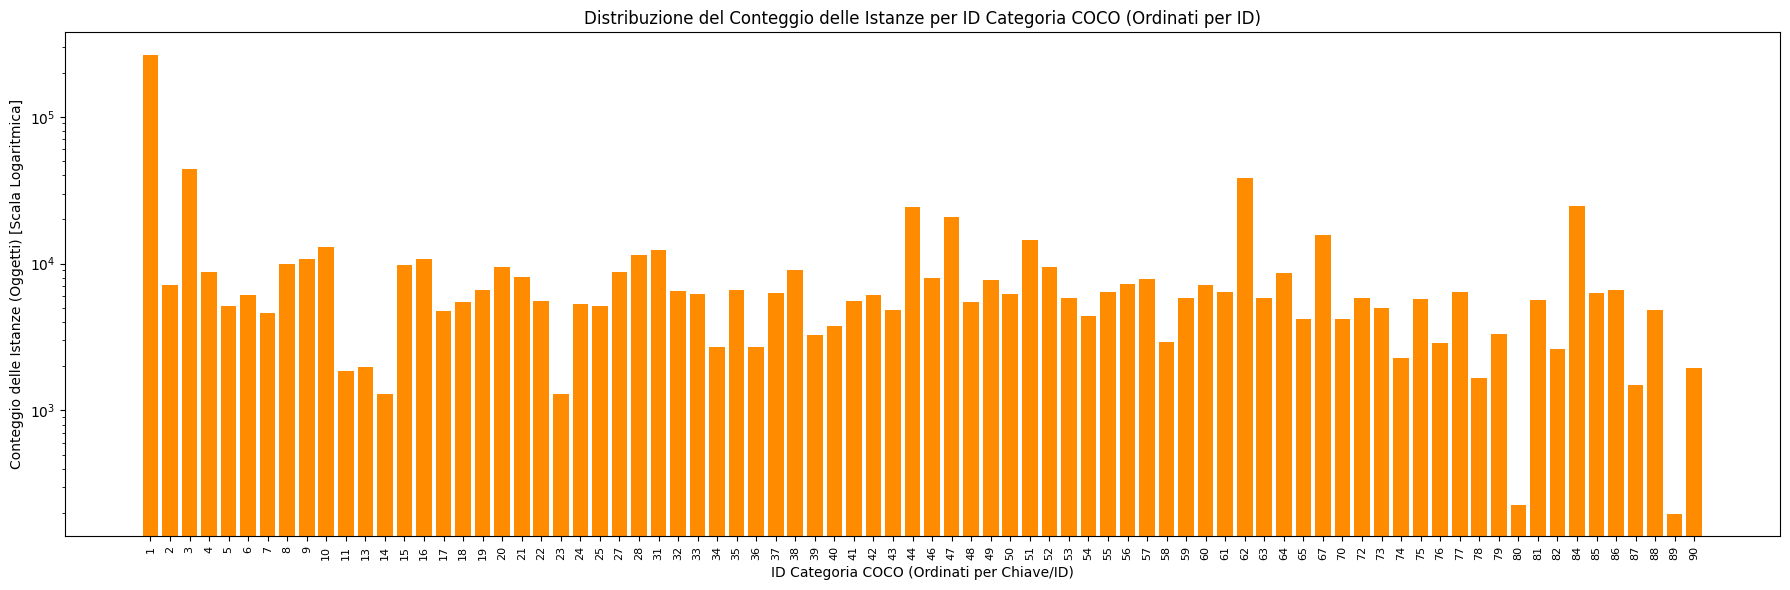

In [37]:
""" PLOTTING DISTRIBUZIONE ISTANZE E SALVATAGGIO EXCEL"""
import matplotlib.pyplot as plt
import operator

# Dati forniti (ID Categoria: Conteggio Istanze)
data_dict = cat_counts

# 1. Ordina i dati per ID Categoria (chiave) in ordine crescente
#    Usiamo itemgetter(0) per ordinare in base alla CHIAVE (l'ID della categoria).
sorted_data = sorted(data_dict.items(), key=operator.itemgetter(0))

# 2. Separa gli ID (chiavi) e i Conteggi (valori)
ids = [str(item[0]) for item in sorted_data]
counts = [item[1] for item in sorted_data]

# 3. Plotting
plt.figure(figsize=(18, 6))
plt.bar(ids, counts, color='darkorange') # Ho cambiato il colore solo per distinguere il nuovo grafico

# 💡 Modifica qui: Imposta l'asse Y su scala logaritmica
plt.yscale('log')

# Aggiungi etichette e titolo (Aggiornati per riflettere l'ordinamento per ID)
plt.xlabel("ID Categoria COCO (Ordinati per Chiave/ID)")
plt.ylabel("Conteggio delle Istanze (Oggetti) [Scala Logaritmica]")
plt.title("Distribuzione del Conteggio delle Istanze per ID Categoria COCO (Ordinati per ID)")

# Regola il layout e ruota le etichette per la leggibilità
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

plt.savefig("coco_instance_counts_ORIGINAL_sorted_by_id_log_VAL.png")


""" SALVATAGGIO DEL DICT """
import pandas as pd

# 1. Converti il dizionario in un DataFrame.
#    - `items()` restituisce (chiave, valore).
#    - `columns` assegna i nomi alle colonne.
df = pd.DataFrame(cat_counts.items(), columns=['category_id', 'instance_count'])

# 2. Salva il DataFrame in un file Excel.
output_filename = 'Numero_istanze_ORIGINAL_TRAIN.xlsx'
df.to_excel(output_filename, index=False) # index=False evita di salvare l'indice del DataFrame

print(f"I dati sono stati salvati in '{output_filename}'")

# SEZIONE DATASET RIDOTTO

In [38]:
# Must have both the original Coco Dataset that the reduced one in order to calculate statistics

# CODE FOR ORIGINAL COCO DATASET 

original_path_val = '/kaggle/input/coco-reduced/kaggle/working/instances_val2017.json'
original_path_train = '/kaggle/input/coco-reduced/kaggle/working/instances_train2017.json'

file_path_val = original_path_val
file_path_train = original_path_train

f_val=open(file_path_val, 'r')
f_train=open(file_path_train,'r')

coco_val = json.load(f_val)
coco_train = json.load(f_train)

matches_val=[]
for anns in coco_val['annotations']:
    #if anns['image_id']==558840:
     matches_val.append(anns)

matches_train=[]
for anns in coco_train['annotations']:
    #if anns['image_id']==558840:
     matches_train.append(anns)
    
print(len(matches_val)) #This value shows the total number of instances across the entire Original Validation Dataset
print(len(matches_train)) #This value shows the total number of instances across the entire Original Train Dataset

3857
85776


In [39]:
#Capire quante imm ho per ogni cat nell Reduced Validation Dataset
catIds=[]
cat_counts={}
img_count=0
for cat in coco_val['categories']:
    if cat['id'] not in catIds:
        catIds.append(cat['id'])  #funziona

for img2 , img in coco_val['annotations'].items():
    img_count+=1
    if img['category_id'] in cat_counts:
        cat_counts[img['category_id']] = cat_counts[img['category_id']] +1
    else:
        cat_counts[img['category_id']] = 1
        
print(img_count)
cat_counts

3857


{18: 22,
 72: 26,
 17: 26,
 44: 124,
 63: 25,
 67: 62,
 2: 48,
 3: 146,
 4: 45,
 9: 39,
 1: 1212,
 64: 29,
 32: 17,
 65: 23,
 82: 8,
 85: 34,
 62: 196,
 8: 30,
 14: 12,
 46: 44,
 47: 105,
 49: 36,
 50: 23,
 51: 75,
 55: 28,
 61: 45,
 70: 16,
 73: 34,
 79: 15,
 80: 1,
 81: 23,
 84: 163,
 86: 27,
 88: 31,
 27: 38,
 13: 9,
 31: 55,
 15: 35,
 56: 21,
 59: 19,
 90: 2,
 57: 30,
 20: 28,
 5: 17,
 6: 32,
 7: 21,
 10: 39,
 11: 11,
 25: 22,
 52: 30,
 75: 15,
 16: 42,
 33: 29,
 77: 26,
 21: 60,
 28: 47,
 40: 18,
 22: 21,
 23: 2,
 34: 16,
 48: 28,
 35: 24,
 19: 24,
 54: 28,
 24: 17,
 39: 33,
 41: 19,
 53: 26,
 74: 7,
 37: 33,
 76: 10,
 36: 6,
 42: 47,
 58: 9,
 60: 17,
 38: 18,
 43: 27,
 87: 5,
 78: 3,
 89: 1}

I dati sono stati salvati in 'Numero_istanze_REDUCED_VAL.xlsx'


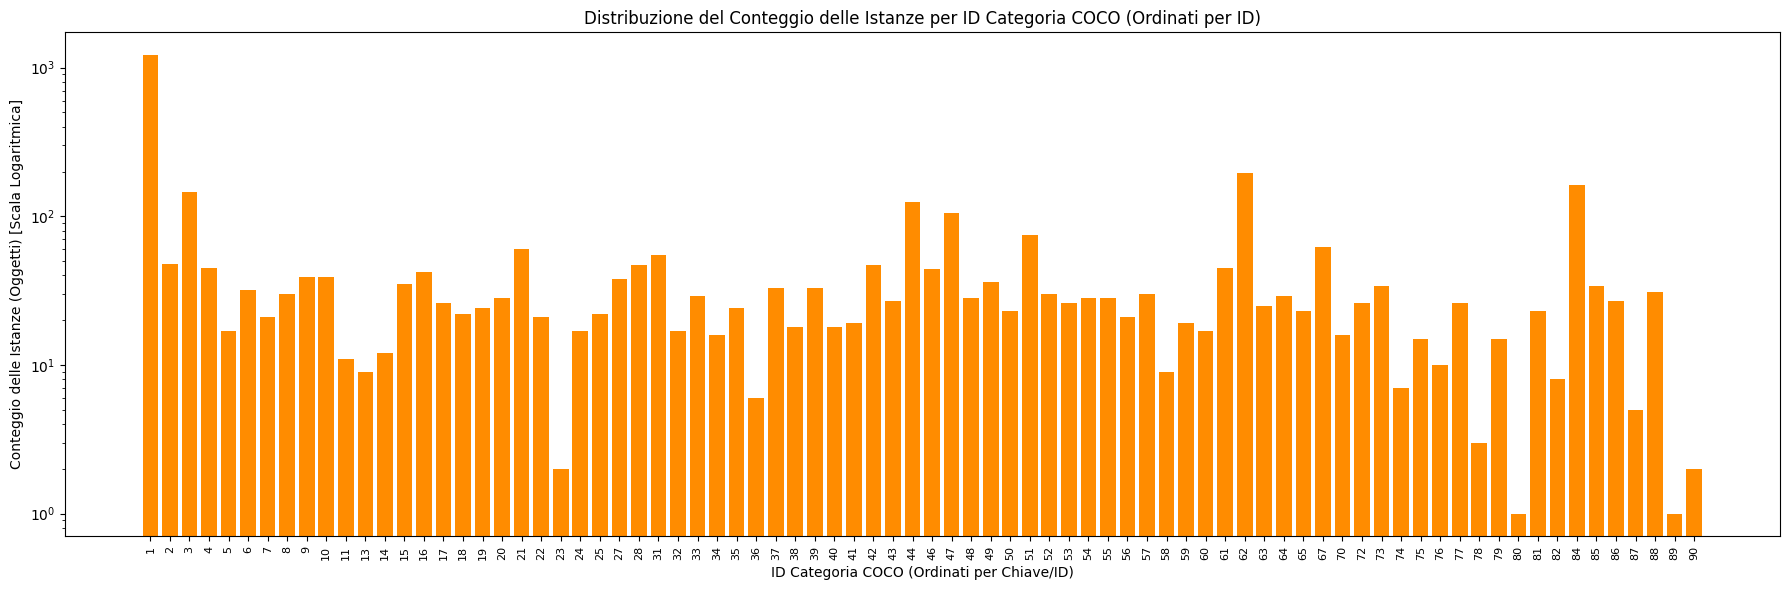

In [40]:
""" PLOTTING DISTRIBUZIONE ISTANZE E SALVATAGGIO EXCEL"""
import matplotlib.pyplot as plt
import operator

# Dati forniti (ID Categoria: Conteggio Istanze)
data_dict = cat_counts

# 1. Ordina i dati per ID Categoria (chiave) in ordine crescente
#    Usiamo itemgetter(0) per ordinare in base alla CHIAVE (l'ID della categoria).
sorted_data = sorted(data_dict.items(), key=operator.itemgetter(0))

# 2. Separa gli ID (chiavi) e i Conteggi (valori)
ids = [str(item[0]) for item in sorted_data]
counts = [item[1] for item in sorted_data]

# 3. Plotting
plt.figure(figsize=(18, 6))
plt.bar(ids, counts, color='darkorange') # Ho cambiato il colore solo per distinguere il nuovo grafico

# 💡 Modifica qui: Imposta l'asse Y su scala logaritmica
plt.yscale('log')

# Aggiungi etichette e titolo (Aggiornati per riflettere l'ordinamento per ID)
plt.xlabel("ID Categoria COCO (Ordinati per Chiave/ID)")
plt.ylabel("Conteggio delle Istanze (Oggetti) [Scala Logaritmica]")
plt.title("Distribuzione del Conteggio delle Istanze per ID Categoria COCO (Ordinati per ID)")

# Regola il layout e ruota le etichette per la leggibilità
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

plt.savefig("coco_instance_counts_ORIGINAL_sorted_by_id_log_VAL.png")


""" SALVATAGGIO DEL DICT """
import pandas as pd

# 1. Converti il dizionario in un DataFrame.
#    - `items()` restituisce (chiave, valore).
#    - `columns` assegna i nomi alle colonne.
df = pd.DataFrame(cat_counts.items(), columns=['category_id', 'instance_count'])

# 2. Salva il DataFrame in un file Excel.
output_filename = 'Numero_istanze_REDUCED_VAL.xlsx'
df.to_excel(output_filename, index=False) # index=False evita di salvare l'indice del DataFrame

print(f"I dati sono stati salvati in '{output_filename}'")

In [41]:
#Capire quante imm ho per ogni cat nell Reduced Train Dataset
catIds=[]
cat_counts={}
img_count=0
for cat in coco_train['categories']:
    if cat['id'] not in catIds:
        catIds.append(cat['id'])  #funziona

for img2 , img in coco_train['annotations'].items():
    img_count+=1
    if img['category_id'] in cat_counts:
        cat_counts[img['category_id']] = cat_counts[img['category_id']] +1
    else:
        cat_counts[img['category_id']] = 1
        
print(img_count)
cat_counts

85776


{18: 538,
 64: 915,
 72: 599,
 16: 977,
 17: 483,
 19: 671,
 20: 982,
 21: 854,
 44: 2496,
 62: 3752,
 67: 1422,
 2: 684,
 3: 4251,
 4: 872,
 6: 587,
 7: 466,
 9: 1277,
 1: 26383,
 13: 168,
 28: 1087,
 32: 602,
 37: 621,
 54: 463,
 65: 426,
 77: 591,
 82: 308,
 85: 601,
 90: 190,
 8: 1018,
 10: 1243,
 11: 171,
 14: 97,
 15: 947,
 22: 504,
 25: 531,
 34: 277,
 35: 654,
 36: 254,
 38: 964,
 42: 582,
 43: 499,
 46: 772,
 47: 2106,
 48: 541,
 49: 768,
 50: 645,
 51: 1355,
 52: 907,
 53: 665,
 55: 681,
 56: 795,
 59: 571,
 61: 602,
 70: 443,
 73: 540,
 74: 257,
 75: 562,
 76: 295,
 78: 142,
 79: 309,
 80: 17,
 81: 566,
 84: 2407,
 86: 647,
 87: 173,
 88: 502,
 27: 840,
 31: 1311,
 33: 603,
 5: 528,
 63: 536,
 24: 520,
 89: 20,
 58: 327,
 41: 553,
 23: 122,
 57: 676,
 60: 770,
 40: 360,
 39: 335}

I dati sono stati salvati in 'Numero_istanze_REDUCED_TRAIN.xlsx'


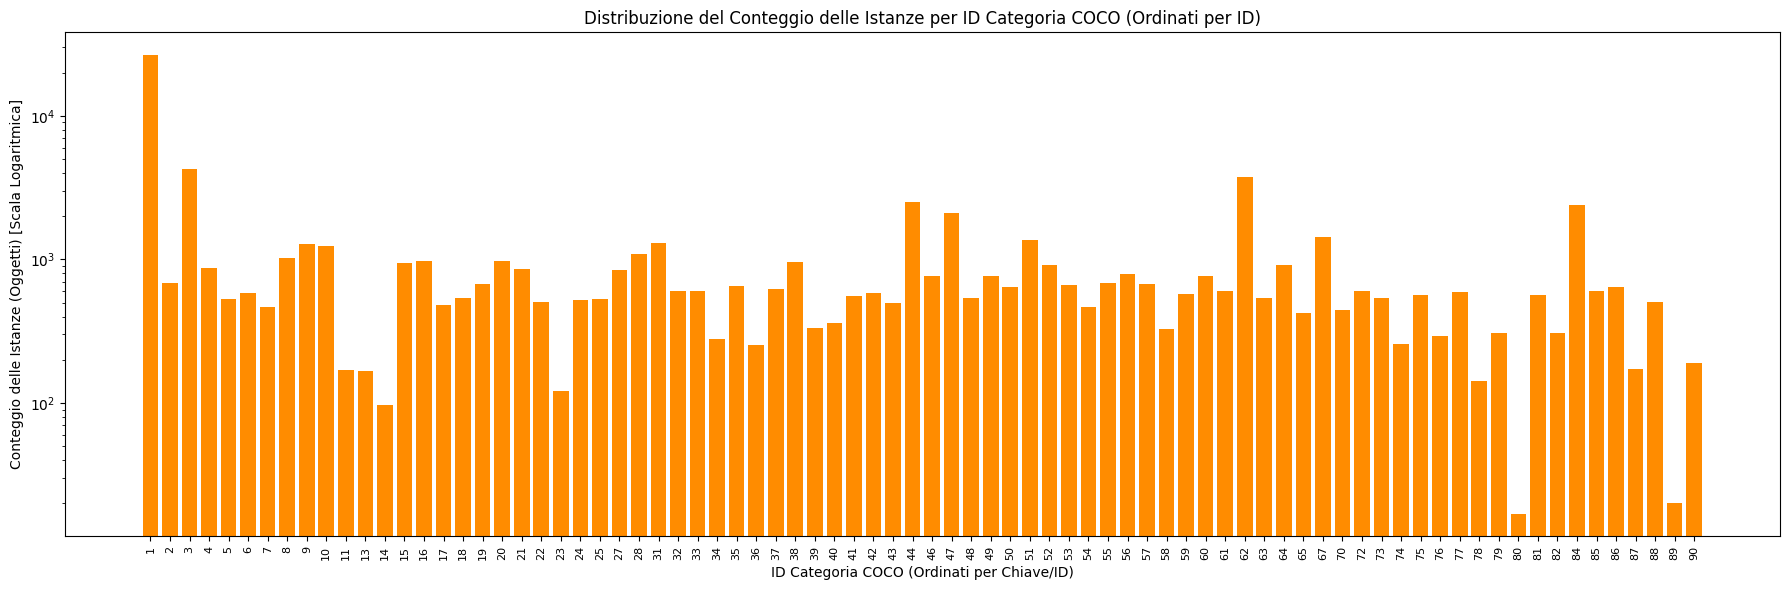

In [42]:
""" PLOTTING DISTRIBUZIONE ISTANZE E SALVATAGGIO EXCEL"""
import matplotlib.pyplot as plt
import operator

# Dati forniti (ID Categoria: Conteggio Istanze)
data_dict = cat_counts

# 1. Ordina i dati per ID Categoria (chiave) in ordine crescente
#    Usiamo itemgetter(0) per ordinare in base alla CHIAVE (l'ID della categoria).
sorted_data = sorted(data_dict.items(), key=operator.itemgetter(0))

# 2. Separa gli ID (chiavi) e i Conteggi (valori)
ids = [str(item[0]) for item in sorted_data]
counts = [item[1] for item in sorted_data]

# 3. Plotting
plt.figure(figsize=(18, 6))
plt.bar(ids, counts, color='darkorange') # Ho cambiato il colore solo per distinguere il nuovo grafico

# 💡 Modifica qui: Imposta l'asse Y su scala logaritmica
plt.yscale('log')

# Aggiungi etichette e titolo (Aggiornati per riflettere l'ordinamento per ID)
plt.xlabel("ID Categoria COCO (Ordinati per Chiave/ID)")
plt.ylabel("Conteggio delle Istanze (Oggetti) [Scala Logaritmica]")
plt.title("Distribuzione del Conteggio delle Istanze per ID Categoria COCO (Ordinati per ID)")

# Regola il layout e ruota le etichette per la leggibilità
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

plt.savefig("coco_instance_counts_ORIGINAL_sorted_by_id_log_VAL.png")


""" SALVATAGGIO DEL DICT """
import pandas as pd

# 1. Converti il dizionario in un DataFrame.
#    - `items()` restituisce (chiave, valore).
#    - `columns` assegna i nomi alle colonne.
df = pd.DataFrame(cat_counts.items(), columns=['category_id', 'instance_count'])

# 2. Salva il DataFrame in un file Excel.
output_filename = 'Numero_istanze_REDUCED_TRAIN.xlsx'
df.to_excel(output_filename, index=False) # index=False evita di salvare l'indice del DataFrame

print(f"I dati sono stati salvati in '{output_filename}'")